<a href="https://colab.research.google.com/github/NeginKhalifat/News_Classifier/blob/main/News_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Upload Dataset:

In [ ]:
import os.path
from os import path
if not path.exists("pol-fake.csv"):
  !wget 'https://raw.githubusercontent.com/NeginKhalifat/News_Classifier/master/pol-fake.csv'

if not path.exists("pol-real.csv"):
  !wget 'https://raw.githubusercontent.com/NeginKhalifat/News_Classifier/master/pol-real.csv'

# Reading Data

In [ ]:
pol_fake_df=pd.read_csv("pol-fake.csv")
pol_real_df=pd.read_csv("pol-real.csv")

# Adding label news

In [ ]:
pol_fake_df["label"]=0
pol_real_df["label"]=1

# Merge 2 dataframes

In [ ]:
dataset=pd.concat([pol_real_df,pol_fake_df])

# suffle dataset

**random_state** = 42 means that every time that code run same output will be return.

In [ ]:
dataset = dataset.sample(frac = 1,random_state=42).reset_index(drop=True)


# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop('label', axis=1)
y=dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# Decision Tree:
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Gini index and entropy are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node.

Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.  Entropy in statistics is analogous to entropy in thermodynamics where it signifies disorder. If there are multiple classes in a node, there is disorder in that node. 


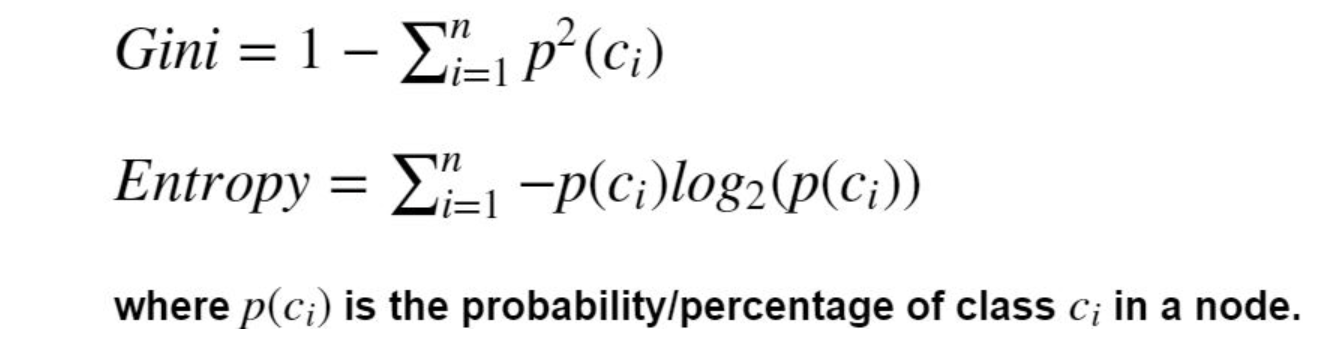

# Decision Tree with the gini index method

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_gini = DecisionTreeClassifier(random_state=42,criterion='gini')
classifier_gini.fit(X_train, y_train);

# Confusion Matrix
to measure the model performance.

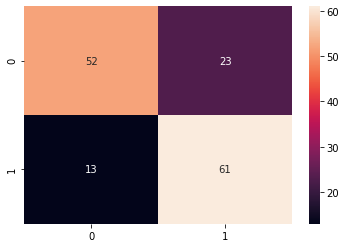

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=classifier_gini.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

<br>


*   TP: True Negative = number of correct predications of fake-news
*   TP: True Positive = number of correct predications of real-news

*   FN: False Negative = number of false predications of fake-news
*   FT: False Positive = number of false predications of real-news


---





*   **Accuracy**:
calculated as the total number of correct predictions divided by the total number of dataset.



*   **Precision**: ` = TP/(TP + FP)`


      average precision = (P(fake)+P(real))/2



*   **Recall**:` = TP/(TP + FN)`<br>


      average percision = (P(fake)+P(real))/2





*   **F1 score**: is good metric when data is imbalanced.
this is a **harmonic mean** of recall and percision.


      F1 score = 2 * (percision * recall)/(percision + recall)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
#print(classification_report( y_test,y_pred))

accuracy_gini=accuracy_score(y_test,y_pred)
print('accuracy: ',accuracy_gini)
print('recall: ',recall_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))

accuracy:  0.7583892617449665
recall:  0.8243243243243243
precision:  0.7261904761904762
F1 score:  0.7721518987341773


# Plot the Decision Tree

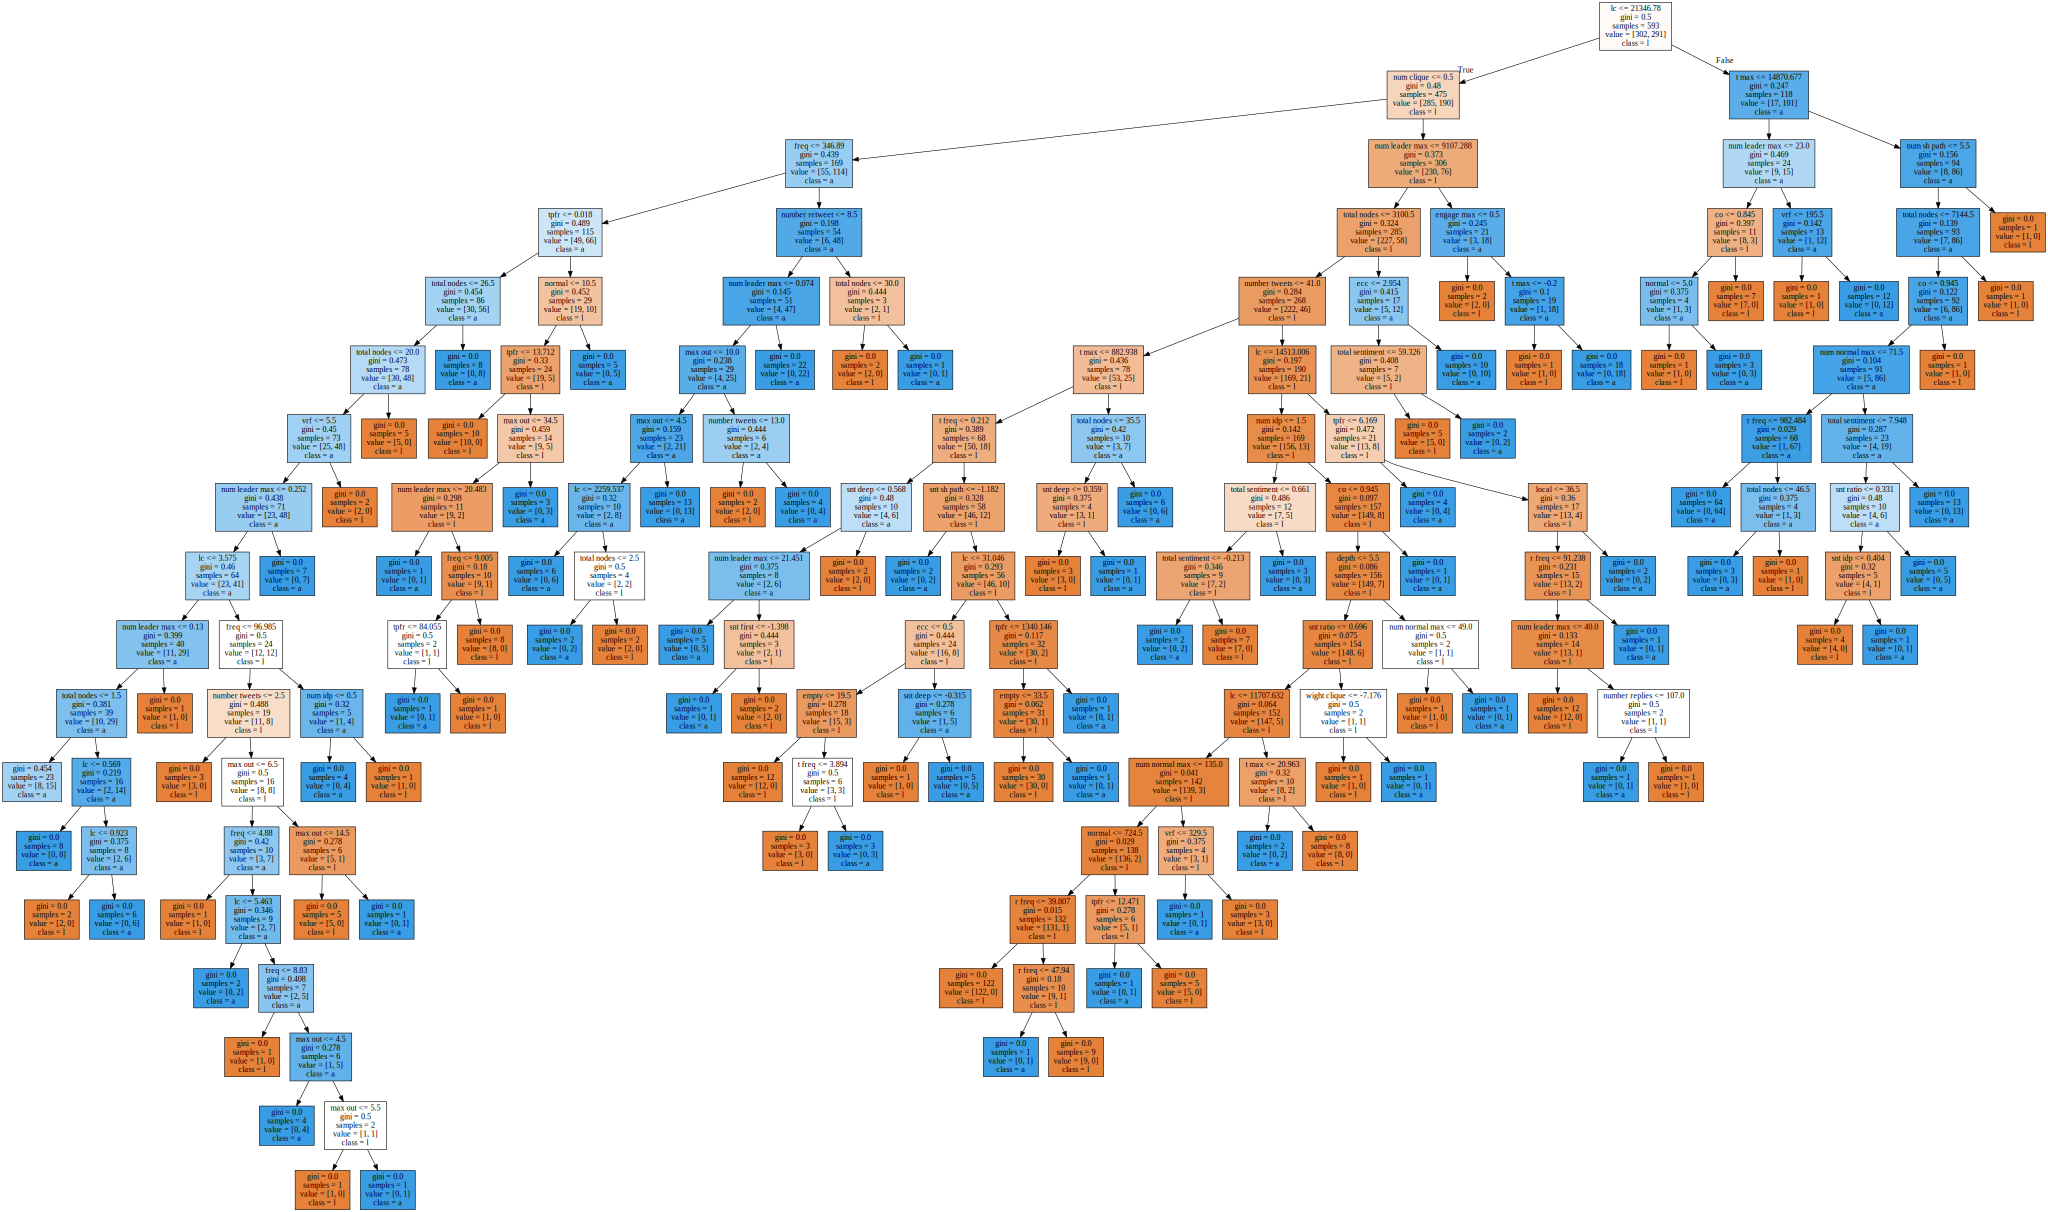

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classifier_gini, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='label',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('decision_tree_gini')
graph


# Decision Tree with the Information gain method 

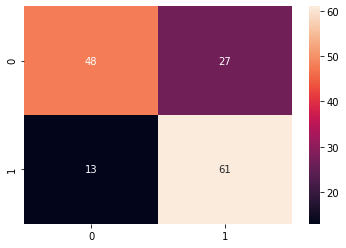

In [ ]:
classifier_entropy = DecisionTreeClassifier(random_state=42,criterion='entropy')
classifier_entropy.fit(X_train, y_train);
y_pred=classifier_entropy.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


In [ ]:
#print(classification_report( y_test,y_pred))
accuracy_entropy=accuracy_score(y_test,y_pred)
print(accuracy_entropy)

print('recall: ',recall_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))

0.7315436241610739
recall:  0.8243243243243243
precision:  0.6931818181818182
F1 score:  0.7530864197530864


# Plot the Decision Tree:

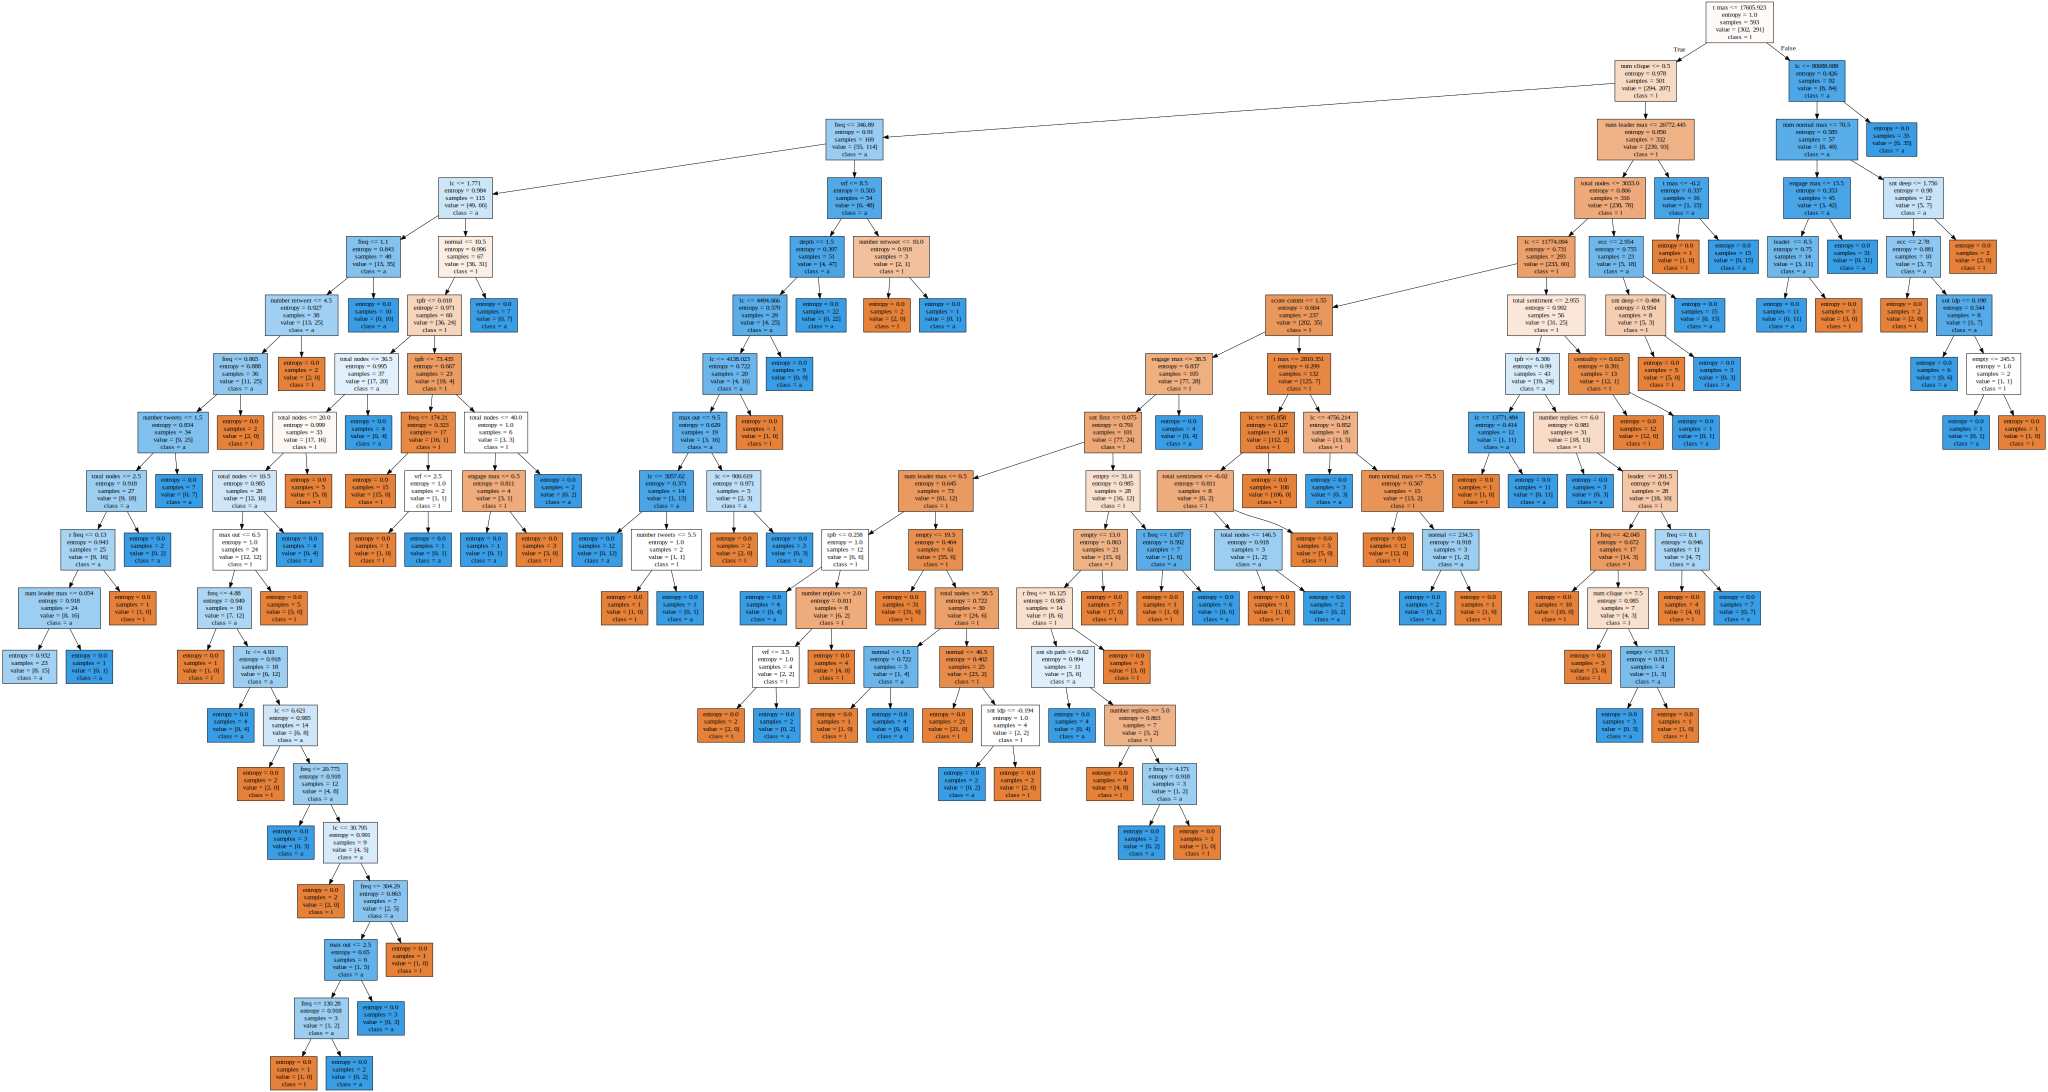

In [ ]:
dot_data = export_graphviz(classifier_entropy, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='label',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('decision_tree_infoGain')
graph

output Files:

1.   decision_tree_gini.png
2.   decision_tree_infoGain.png




# 10 Fold Cross Validation:

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

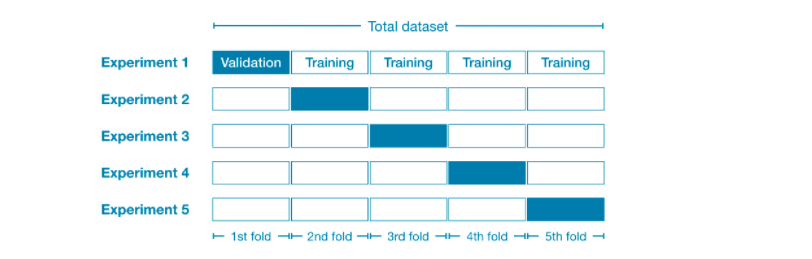

Then, we run one experiment for each fold:


*   In Experiment 1, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.

*   In Experiment 2, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
*   We repeat this process, using every fold once as the holdout set. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

In [ ]:
from sklearn.model_selection import cross_val_score
all_scores=[]
for i in range(5,21):
  
  best_model=DecisionTreeClassifier(max_depth=i,random_state=42)
  all_scores.append((i,cross_val_score(best_model,X,y,cv=10,scoring='accuracy').mean()))

all_scores.sort(key=lambda x:x[1],reverse=True)
print(all_scores)
print("Best depth: ",all_scores[0][0])
print("Best accuracy: ",all_scores[0][1])

[(6, 0.7480360360360361), (5, 0.7398558558558559), (7, 0.7237297297297298), (9, 0.7223963963963963), (8, 0.7209909909909911), (10, 0.7156756756756757), (14, 0.7061801801801803), (20, 0.7034954954954954), (11, 0.7021981981981982), (18, 0.7021621621621621), (19, 0.6994954954954955), (16, 0.6994954954954954), (12, 0.6994774774774775), (17, 0.6994414414414414), (15, 0.6967927927927928), (13, 0.6845945945945946)]
Best depth:  6
Best accuracy:  0.7480360360360361


# Comparing accuracy:

In [ ]:

print("Decision Tress with Gini method 's accuracy:",accuracy_gini)
print("Decision Tress with Infomation Gain method 's accuracy:",accuracy_entropy)


print("Best Accuracy in depth ",all_scores[0][0]," : ",all_scores[0][1])

Decision Tress with Gini method 's accuracy: 0.7583892617449665
Decision Tress with Infomation Gain method 's accuracy: 0.7315436241610739
Best Accuracy in depth  6  :  0.7480360360360361


# Random Forrest

random forest builds **multiple decision trees and merges them together** to get a more accurate and stable prediction.


"deep" decision trees might suffer from overfitting. Most of the time, random forest prevents this by creating random subsets of the features and building smaller trees using those subsets.

Random Forests correct for **high variance** (overfitting) of decision trees
<br>


# Steps:




        1.   Create a bootstrapped dataset with a subset of available variables
        2.   Fit Decision Tree
        3.   Repeat many times and tally predictions
        4.   Class with most “votes" is predicted dass


# Advantages of Random Forest:




1.   Not very sensitive to outliers: 

  This is due to:
          1) Recursive partitioning by decision trees
          2) Trees modeling locally on their input data at each leaf





2.   Forests are fairly stable and do not change much due to new data
3.   Able to handle missing data

  options:
          1) Replace missing continuous data with median, categorical data with most frequent value (both by class)
          2) Fill roughly, fit RF, then use proximity weighted median or most common value by class. Repeat -4-6 times. 




4.   Can be used for unsupervised learning (clustering)



# Disadvantages of Random Forest:



1.   RFs can be slow and memory intensive
2.   Variable importance can be biased if categorical variables have few levels or variables are correlated



# Implement Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_randomForrest = RandomForestClassifier( random_state=42,)
model_randomForrest.fit(X_train, y_train);
accuracy_rf=accuracy_score(y_test,y_pred)

# Compare the acuuracy

In [ ]:
print("Decision Tress with Gini method 's accuracy:",accuracy_gini)
print("Decision Tress with Infomation Gain method 's accuracy:",accuracy_entropy)
print("Best Accuracy in depth ",all_scores[0][0]," : ",all_scores[0][1])

print("Random Forest's accuracy:",accuracy_rf)

Decision Tress with Gini method 's accuracy: 0.7583892617449665
Decision Tress with Infomation Gain method 's accuracy: 0.7315436241610739
Best Accuracy in depth  6  :  0.7480360360360361
Random Forest's accuracy: 0.7315436241610739
